
# Regression models to predict property prices in Tallkrogen

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, SGDRegressor, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from subprocess import check_output


### Call the Node Hemnet scraper which saves .json data file of sold properties in Tallkrogen
#### not needed as scraper can be called directly

In [418]:
#check_output(['npm', 'run start'])

### Read in sold property json as dataframe

In [419]:
tallkrogen_sold_prices_df = pd.read_json("../data/soldData.json", dtype={
    'address': "string",
    'soldDate': "string",
    'livingArea': int,
    'extraArea': int,
    'land': int,
    'rooms': int,
    'houseType': "string",
    'assignment': "string",
    'askingPrice': int,
    'soldPrice': int
})


In [420]:
tallkrogen_sold_prices_df.head(10)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Lingvägen 68,2013-04-09,69,69,520,5,Villa,Äganderätt,3400000,3400000
1,Amatörvägen 58,2013-05-10,65,52,464,5,Villa,Äganderätt,3750000,4270000
2,Amatörvägen 11,2013-08-29,65,65,338,4,Villa,Äganderätt,3895000,4250000
3,Olympiavägen 40,2013-05-24,50,50,501,3,Villa,Äganderätt,4200000,4200000
4,Rikstensvägen 6,2013-06-11,93,62,623,7,Villa,Äganderätt,5150000,5250000
5,Diskusvägen 32,2013-07-05,106,50,1022,5,Villa,Äganderätt,4925000,5140000
6,Diskusvägen 12,2013-09-15,80,75,864,5,Villa,Äganderätt,4350000,4950000
7,LemmingsVäg 4,2013-01-20,,,,8,Villa,Äganderätt,,4800000
8,Maratonvägen 43,2013-09-20,95,48,501,4,Villa,Äganderätt,5500000,5400000
9,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000


In [421]:
tallkrogen_sold_prices_df.shape

(221, 10)

In [422]:
tallkrogen_sold_prices_df.dtypes

address        object
soldDate       object
livingArea     object
extraArea      object
land           object
rooms          object
houseType      object
assignment     object
askingPrice    object
soldPrice       int64
dtype: object

### Checking each attribute to confirm its type is accurate

In [423]:
def checkAttribute(row): 
    try:
        str(row["address"])
    except:
        return False
    try:
        str(row["soldDate"])
    except:
        return False
    try:
        float(row["livingArea"])
    except:
        return False
    try:
        float(row["extraArea"])
    except:
        return False
    try:
        float(row["land"])
    except:
        return False
    try:
        float(row["rooms"])
    except:
        return False
    try:
        str(row["houseType"])
    except:
        return False
    try:
        str(row["assignment"])
    except:
        return False
    try:
        float(row["askingPrice"])
    except:
        return False
    try:
        float(row["soldPrice"])
    except:
        return False
    return True

In [424]:
for index, row in tallkrogen_sold_prices_df.iterrows():
    if checkAttribute(row) == False:
        tallkrogen_sold_prices_df.drop(index=index, inplace=True)

In [425]:
tallkrogen_sold_prices_df.head(10)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Lingvägen 68,2013-04-09,69,69,520,5,Villa,Äganderätt,3400000,3400000
1,Amatörvägen 58,2013-05-10,65,52,464,5,Villa,Äganderätt,3750000,4270000
2,Amatörvägen 11,2013-08-29,65,65,338,4,Villa,Äganderätt,3895000,4250000
3,Olympiavägen 40,2013-05-24,50,50,501,3,Villa,Äganderätt,4200000,4200000
4,Rikstensvägen 6,2013-06-11,93,62,623,7,Villa,Äganderätt,5150000,5250000
5,Diskusvägen 32,2013-07-05,106,50,1022,5,Villa,Äganderätt,4925000,5140000
6,Diskusvägen 12,2013-09-15,80,75,864,5,Villa,Äganderätt,4350000,4950000
8,Maratonvägen 43,2013-09-20,95,48,501,4,Villa,Äganderätt,5500000,5400000
9,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000
10,Häringevägen 4,2013-11-21,87,86,485,5,Villa,Äganderätt,4950000,5750000


In [426]:
tallkrogen_sold_prices_df.shape

(211, 10)

In [427]:
tallkrogen_sold_prices_df["houseType"].unique()
tallkrogen_sold_prices_df = tallkrogen_sold_prices_df.drop("houseType", axis=1)

### casting the soldDate attribute to pandas datetime

In [428]:
tallkrogen_sold_prices_df['soldDate'] = pd.to_datetime(tallkrogen_sold_prices_df['soldDate'])

In [429]:
tallkrogen_sold_prices_df.head(10)

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice
0,Lingvägen 68,2013-04-09,69,69,520,5,Äganderätt,3400000,3400000
1,Amatörvägen 58,2013-05-10,65,52,464,5,Äganderätt,3750000,4270000
2,Amatörvägen 11,2013-08-29,65,65,338,4,Äganderätt,3895000,4250000
3,Olympiavägen 40,2013-05-24,50,50,501,3,Äganderätt,4200000,4200000
4,Rikstensvägen 6,2013-06-11,93,62,623,7,Äganderätt,5150000,5250000
5,Diskusvägen 32,2013-07-05,106,50,1022,5,Äganderätt,4925000,5140000
6,Diskusvägen 12,2013-09-15,80,75,864,5,Äganderätt,4350000,4950000
8,Maratonvägen 43,2013-09-20,95,48,501,4,Äganderätt,5500000,5400000
9,Olympiavägen 82,2013-10-03,64,64,476,2,Äganderätt,3160000,3160000
10,Häringevägen 4,2013-11-21,87,86,485,5,Äganderätt,4950000,5750000


In [430]:
tallkrogen_sold_prices_df["soldDate"]

0     2013-04-09
1     2013-05-10
2     2013-08-29
3     2013-05-24
4     2013-06-11
         ...    
215   2020-09-10
217   2020-09-13
218   2020-08-25
219   2020-11-06
220   2020-09-24
Name: soldDate, Length: 211, dtype: datetime64[ns]

### Assingment attribute is either Äganderätt or Tomträtt. As this are categorical datum, we label this numerically,  with Äganderätt being 1 and Tomträtt being 0. This is added in a new attribute named assignment_num

In [431]:
assignment_dict = {"Äganderätt": 1, "Tomträtt": 0}
tallkrogen_sold_prices_df['assignment_num'] = tallkrogen_sold_prices_df['assignment']
tallkrogen_sold_prices_df['assignment_num'].replace(assignment_dict, inplace=True)


tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice,assignment_num
0,Lingvägen 68,2013-04-09,69,69,520,5,Äganderätt,3400000,3400000,1
1,Amatörvägen 58,2013-05-10,65,52,464,5,Äganderätt,3750000,4270000,1
2,Amatörvägen 11,2013-08-29,65,65,338,4,Äganderätt,3895000,4250000,1
3,Olympiavägen 40,2013-05-24,50,50,501,3,Äganderätt,4200000,4200000,1
4,Rikstensvägen 6,2013-06-11,93,62,623,7,Äganderätt,5150000,5250000,1


### Scatter plot of sold date and price
We can clearly see a linear regression between sold date and price

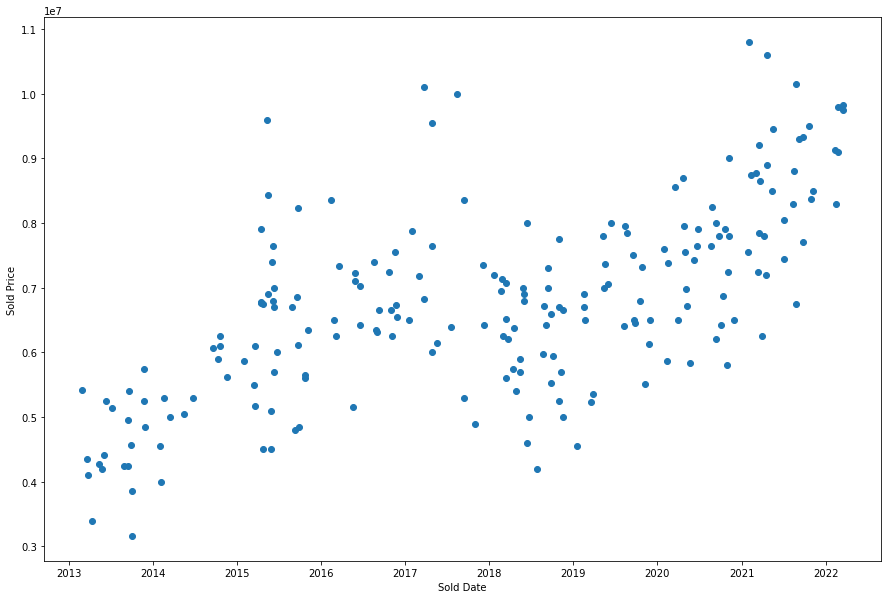

In [432]:
plt.subplots(figsize=(15,10))
plt.scatter(tallkrogen_sold_prices_df['soldDate'], tallkrogen_sold_prices_df['soldPrice'])
plt.xlabel("Sold Date")
plt.ylabel("Sold Price")
plt.show()

### Creating a new attribute price per sq meter, which is sold price divided by living area and extra area.

In [433]:
tallkrogen_sold_prices_df["price_per_sq_meter"] = tallkrogen_sold_prices_df["soldPrice"].astype(int) / (tallkrogen_sold_prices_df["livingArea"].astype(int) + (tallkrogen_sold_prices_df["extraArea"].astype(int)))

In [434]:
tallkrogen_sold_prices_df["soldPrice"].astype(int)

0      3400000
1      4270000
2      4250000
3      4200000
4      5250000
        ...   
215    6200000
217    8000000
218    8250000
219    7800000
220    7800000
Name: soldPrice, Length: 211, dtype: int64

In [435]:
tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice,assignment_num,price_per_sq_meter
0,Lingvägen 68,2013-04-09,69,69,520,5,Äganderätt,3400000,3400000,1,24637.681159
1,Amatörvägen 58,2013-05-10,65,52,464,5,Äganderätt,3750000,4270000,1,36495.726496
2,Amatörvägen 11,2013-08-29,65,65,338,4,Äganderätt,3895000,4250000,1,32692.307692
3,Olympiavägen 40,2013-05-24,50,50,501,3,Äganderätt,4200000,4200000,1,42000.000000
4,Rikstensvägen 6,2013-06-11,93,62,623,7,Äganderätt,5150000,5250000,1,33870.967742


### Scatter plot of sold date and price per sq meter
We can clearly see a linear regression between sold date and price per sq meter

Text(0, 0.5, 'price_per_sq_meter')

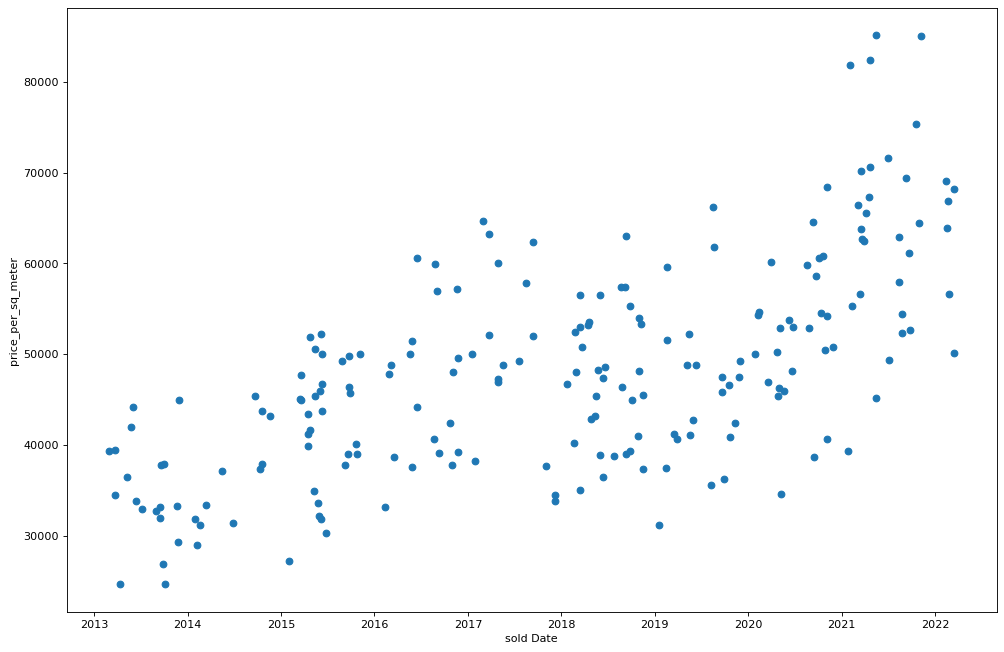

In [436]:
plt.figure(figsize=(15,10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldDate"], y=tallkrogen_sold_prices_df["price_per_sq_meter"])
plt.xlabel("sold Date")
plt.ylabel("price_per_sq_meter")

In [437]:
tallkrogen_sold_prices_2021_df = tallkrogen_sold_prices_df[tallkrogen_sold_prices_df["soldDate"] >= "2021"]

In [438]:
tallkrogen_sold_prices_2021_df.shape

(33, 11)

In [439]:
X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [440]:
reg.predict([[92, 51, 336, 5]])

array([7314713.22027064])

### Adding new attribute of sold year so it can be used to create the linear regression model

In [441]:
tallkrogen_sold_prices_df["soldYear"] = tallkrogen_sold_prices_df["soldDate"].dt.year


### Creating a linear regression model with "livingArea", "extraArea", "land", "rooms", "soldYear" being the features and "soldPrice" being the target

In [442]:
X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms", "soldYear"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

### Example prediction using above model

In [443]:
reg.predict([[92, 51, 336, 5, 2022]])

array([8780851.00628674])

### Creating a Random Forest Regressor model with "livingArea", "extraArea", "land", "rooms", "soldYear" being the features and "soldPrice" being the target

In [444]:
X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms", "soldYear"]]
y = tallkrogen_sold_prices_df["soldPrice"]
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

### Example prediction using above model


In [445]:
regr.predict([[92, 51, 336, 5, 2022]])

array([8674116.22550938])

In [446]:
X = tallkrogen_sold_prices_2021_df[["livingArea", "extraArea", "land", "rooms", "assignment_num"]]
y = tallkrogen_sold_prices_2021_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [447]:
reg.predict([[92, 51, 336, 5, 1]])

array([9094499.56454024])

Text(0, 0.5, 'Date')

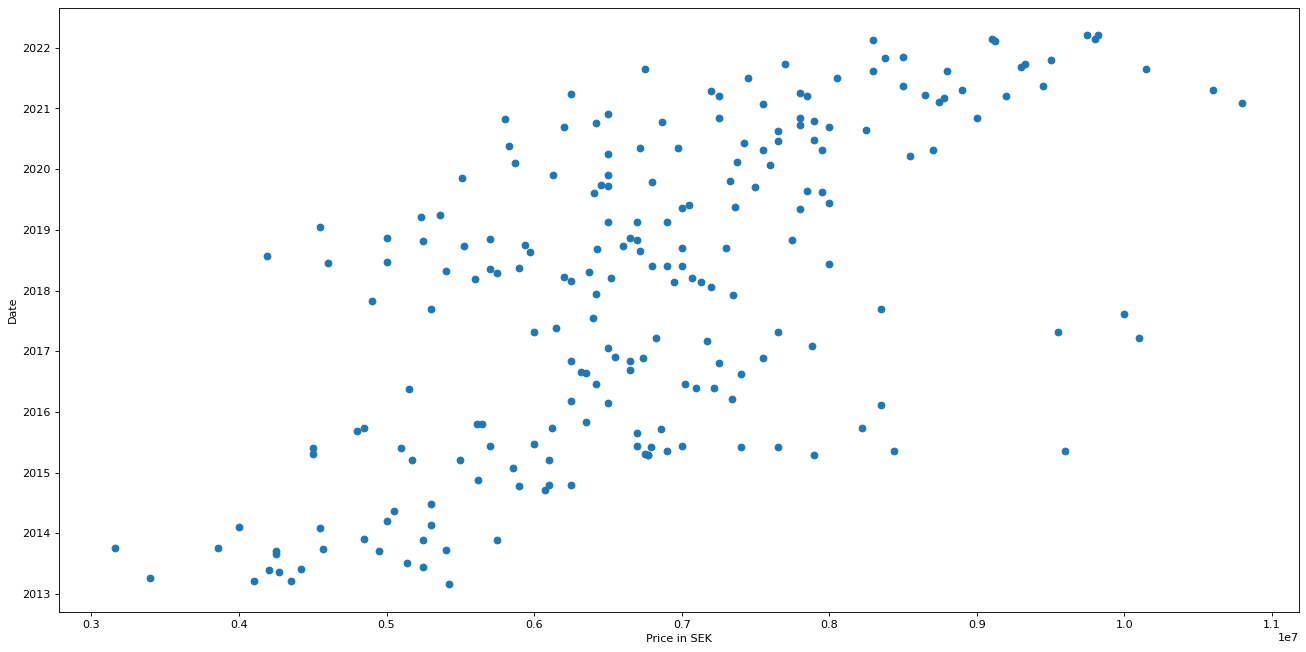

In [448]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")

In [449]:
y_predict = reg.predict(X)


In [450]:
X = tallkrogen_sold_prices_df[["soldPrice"]]
y = tallkrogen_sold_prices_df["soldDate"]
reg = LinearRegression().fit(X, y)

In [451]:
y_predict = reg.predict(X)

In [452]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")
plt.plot(X["soldPrice"], y_predict, '-r', label='linear regression')

ValueError: view limit minimum -8.288102887338e+16 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

## 

## Regression Models

### Helper function to build and train models 

In [453]:
def build_and_train_model(data, target_name, unreq_cols, fn):
    
    drop_cols = [target_name, *unreq_cols] 
    
    X = data.drop(drop_cols, axis=1)
    Y = data[target_name]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size = 0.2, random_state=0)

    model = fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred
           }

### Linear Regression

In [514]:
def linear_model(x_train, y_train):
    
    print("Linear Regression")
    linear_regression = LinearRegression()
    print(x_train)
    print(y_train)
    linear_regression.fit(x_train, y_train)
    
    return linear_regression

In [515]:
linear_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment"], linear_model)

Linear Regression
    livingArea extraArea land rooms askingPrice  assignment_num  \
23          66        66  551     5     6500000               1   
163         69        69  491     4     4350000               1   
46          68        68  553     4     9100000               1   
113        104        65  578     5     7995000               1   
4           93        62  623     7     5150000               1   
..         ...       ...  ...   ...         ...             ...   
69          64        64  454     4     4575000               1   
200         62        62  531     4     5995000               1   
123         90        62  578     5     6995000               1   
48          63        63  437     6     7995000               1   
179        138        60  560     7     5500000               1   

     price_per_sq_meter  soldYear  
23         49242.424242      2019  
163        28985.507246      2014  
46         66911.764706      2022  
113        47337.278107      2018

### Lasso Regression


In [456]:
def lasso_model(x_train, y_train):
    
    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    
    lasso_regression.fit(x_train, y_train)
    
    return lasso_regression

In [457]:
lasso_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment"], lasso_model)

Lasso Regression
Training Score :  0.964726852965034
Testing Score :  0.9642933592810186


### Ridge Regression


In [458]:
def ridge_model(x_train, y_train):
    
    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.9)
    
    ridge_regression.fit(x_train, y_train)
    
    return ridge_regression

In [459]:
ridge_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment"], ridge_model)

Ridge Regression
Training Score :  0.9647267018124894
Testing Score :  0.9643155194230477


### Random Forest Regression


In [460]:
def random_forest_model(x_train, y_train):
    
    print("Random Forest Regression")
    randon_forest_regression = RandomForestRegressor(max_depth=2, random_state=0)
    
    randon_forest_regression.fit(x_train, y_train)
    
    return randon_forest_regression


In [461]:
random_forest_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment"], random_forest_model)

Random Forest Regression
Training Score :  0.8278105765498306
Testing Score :  0.8212459314690881


###  Stochastic Gradient Descent Regression

In [462]:
def sgd_model(x_train, y_train):
    
    print("SGD Regression")
    sgd_regression = SGDRegressor(max_iter=2000)
    
    sgd_regression.fit(x_train, y_train)
    
    return sgd_regression

In [463]:
sgd_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment"], sgd_model)

SGD Regression
Training Score :  -2.0140565269737513e+32
Testing Score :  -2.0087774025319908e+32


In [524]:
tallkrogen_for_sale_df = pd.read_json("../data/forSaleData.json", dtype={
    'address': "string",
    'livingArea': int,
    'extraArea': int,
    'land': int,
    'rooms': int,
    'houseType': "string",
    'assignment_num': int,
    'askingPrice': int,
    'soldYear': int
})

In [525]:
tallkrogen_for_sale_df.head()
tallkrogen_for_sale_df.drop(["address", "houseType"], axis=1)

,livingArea,extraArea,land,rooms,assignment_num,askingPrice,soldYear
0,83,68,498,6,1,8495000,2020
1,72,54,464,5,1,6795000,2020
2,92,82,400,4,1,6500000,2020


In [527]:
tallkrogen_for_sale_df["price_per_sq_meter"] = tallkrogen_for_sale_df["askingPrice"].astype(int) / (tallkrogen_for_sale_df["livingArea"].astype(int) + (tallkrogen_for_sale_df["extraArea"].astype(int)))

In [521]:
cols_sold = list(tallkrogen_sold_prices_df.columns)
cols_sold

['address',
 'soldDate',
 'livingArea',
 'extraArea',
 'land',
 'rooms',
 'assignment',
 'askingPrice',
 'soldPrice',
 'assignment_num',
 'price_per_sq_meter',
 'soldYear']

In [529]:
cols = list(tallkrogen_for_sale_df.columns)
cols
tallkrogen_for_sale_df = tallkrogen_for_sale_df[['livingArea', 'extraArea', 'land', 'rooms', 'askingPrice', 'assignment_num', 'price_per_sq_meter', 'soldYear']]


In [531]:
linear_reg['model'].predict(tallkrogen_for_sale_df)

array([8499848.24167984, 6987583.16273335, 6778025.61557652])

In [528]:
lasso_reg['model'].predict(tallkrogen_for_sale_df.drop(["address", "houseType"], axis=1))

array([1.82519713e+11, 1.45914627e+11, 1.39714056e+11])